In [ ]:
import pandas as pd
df=pd.read_csv(r'/Users/ziranfeng/Desktop/US_Accidents.csv')
df.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day


In [ ]:
#slice the data to year 2022
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df_2022 = df[df['Start_Time'].dt.year == 2022]
df_2022.to_csv('US_Accidents_2022.csv', index=False)
df_2022.head(2)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
512217,A-512230,Source2,1,2022-09-08 05:49:30,2022-09-08 06:34:53,41.946796,-88.208092,NaN,NaN,0.0,...,False,False,False,False,True,False,Night,Night,Day,Day
512218,A-512231,Source2,1,2022-09-08 02:02:05,2022-09-08 04:31:32,34.521172,-117.958076,NaN,NaN,0.0,...,False,False,False,False,False,False,Night,Night,Night,Night


In [ ]:
#check if the dataset exists duplicated record
df_2022.duplicated().sum()

0

In [ ]:
# as we plan to explore severity vs visibility, remove the missing records in visibility(mi)
df_2022 = df.dropna(subset=['Visibility(mi)'])

In [ ]:
# drop End_Lat and End_Lng columns since we have all records in start_lat and start_lng
df_2022.drop(columns=['End_Lat', 'End_Lng'], axis=1, inplace=True)

/var/folders/nz/9ql5zp9514n65j_rqhrthwtw0000gn/T/ipykernel_77847/698928362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022.drop(columns=['End_Lat', 'End_Lng'], axis=1, inplace=True)


In [ ]:
#drop other variables that are not considered in our project to reduce the file size
df=df_2022[['Severity','Visibility(mi)']]
df.to_csv('US_Accidents_Cleaned',index=False)
df.head(10)

,Severity,Visibility(mi)
0,3,10.0
1,2,10.0
2,2,10.0
3,3,9.0
4,2,6.0
5,3,7.0
6,2,7.0
7,3,7.0
8,2,5.0
9,3,3.0


In [ ]:
df.describe()

,Severity,Visibility(mi)
count,7.551296e+06,7.551296e+06
mean,2.211485e+00,9.090376e+00
std,4.864240e-01,2.688316e+00
min,1.000000e+00,0.000000e+00
25%,2.000000e+00,1.000000e+01
50%,2.000000e+00,1.000000e+01
75%,2.000000e+00,1.000000e+01
max,4.000000e+00,1.400000e+02


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7551296 entries, 0 to 7728393
Data columns (total 2 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Severity        int64  
 1   Visibility(mi)  float64
dtypes: float64(1), int64(1)
memory usage: 172.8 MB


In [ ]:
# Define the bins and labels for the visibility categories
bins = [0, 1, 3, 10, float('inf')]
labels = ['Low Visibility', 'Moderate Visibility', 'Good Visibility', 'Excellent Visibility']

# Categorize the visibility data
df['Visibility Category'] = pd.cut(df['Visibility(mi)'], bins=bins, labels=labels, right=False)

# Display the first few rows of the modified DataFrame
df.head()

/var/folders/nz/9ql5zp9514n65j_rqhrthwtw0000gn/T/ipykernel_77847/1600102469.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Visibility Category'] = pd.cut(df['Visibility(mi)'], bins=bins, labels=labels, right=False)


,Severity,Visibility(mi),Visibility Category
0,3,10.0,Excellent Visibility
1,2,10.0,Excellent Visibility
2,2,10.0,Excellent Visibility
3,3,9.0,Good Visibility
4,2,6.0,Good Visibility


In [ ]:
# Count the number of observations in each visibility category
visibility_counts = df['Visibility Category'].value_counts()
visibility_counts

Excellent Visibility    6101076
Good Visibility         1063602
Moderate Visibility      269487
Low Visibility           117131
Name: Visibility Category, dtype: int64

In [ ]:
# Create the contingency table
contingency_table = pd.crosstab(df['Severity'], df['Visibility Category'])
contingency_table

Visibility Category,Low Visibility,Moderate Visibility,Good Visibility,Excellent Visibility
Severity,,,,
1,418,1145,6755,58113
2,96117,211998,838746,4871883
3,16394,48877,192280,1011275
4,4202,7467,25821,159805


In [ ]:
from scipy.stats import chi2_contingency
# Perform the chi-square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, dof, expected

(4962.777704613812,
 0.0,
 9,
 array([[1.03043629e+03, 2.37075740e+03, 9.35682358e+03, 5.36729827e+04],
        [9.33590080e+04, 2.14794025e+05, 8.47741653e+05, 4.86284931e+06],
        [1.96812386e+04, 4.52812487e+04, 1.78714471e+05, 1.02514904e+06],
        [3.06031715e+03, 7.04096855e+03, 2.77890519e+04, 1.59404662e+05]]))

chi-square statistic: 4962.78
p-value: 0
degrees of freedom: 9    

The very small p-value (0.0) suggests that
there is a statistically significant association between the "Severity of Accident" and "Visibility of Road" categories.
This means that the distribution of accident severities is not independent of the visibility conditions

In [ ]:
# Counting the number of accidents for each combination of severity level and visibility category
accident_counts = df.groupby('Severity')['Visibility Category'].value_counts().unstack().fillna(0)

# Calculating row and column sums
accident_row_sums = accident_counts.sum(axis=1)
accident_column_sums = accident_counts.sum(axis=0)

# Adding row and column sums to the table
accident_counts_with_sums = accident_counts.copy()
accident_counts_with_sums['Total by Severity'] = accident_row_sums
accident_counts_with_sums.loc['Total by Visibility'] = accident_column_sums

# Replacing the 0 with NaN in the "Total by Visibility" row of the final column
accident_counts_with_sums.loc['Total by Visibility', 'Total by Severity'] = float('nan')

# Displaying the updated table with integer values
accident_counts_with_sums_filled = accident_counts_with_sums.fillna(0).astype(int)
accident_counts_with_sums_filled.loc['Total by Visibility', 'Total by Severity'] = float('nan')
accident_counts_with_sums_filled

,Excellent Visibility,Good Visibility,Moderate Visibility,Low Visibility,Total by Severity
Severity,,,,,
1,58113,6755,1145,418,66431.0
2,4871883,838746,211998,96117,6018744.0
3,1011275,192280,48877,16394,1268826.0
4,159805,25821,7467,4202,197295.0
Total by Visibility,6101076,1063602,269487,117131,NaN


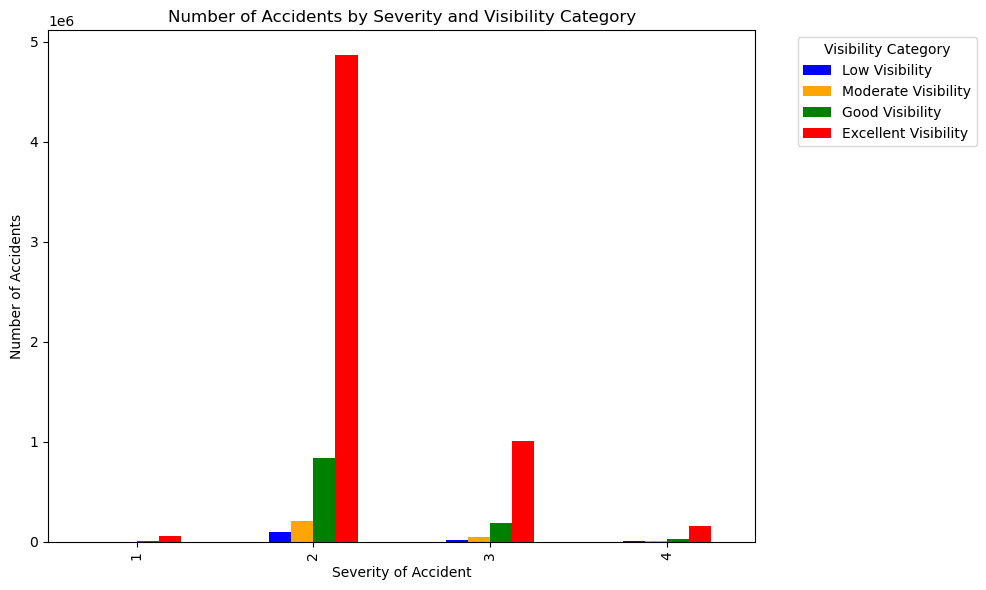

In [ ]:
colors = ['blue', 'orange', 'green', 'red']
# Plot the column chart with specific colors for each visibility category
ax = contingency_table.plot(kind='bar', color=colors, figsize=(10, 6))
plt.title('Number of Accidents by Severity and Visibility Category')
plt.xlabel('Severity of Accident')
plt.ylabel('Number of Accidents')
plt.legend(title='Visibility Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Calculating row and column sums
row_sums = overall_severity_percentages.sum(axis=1).round(2)
column_sums = overall_severity_percentages.sum(axis=0).round(2)

# Adding row and column sums to the table
overall_severity_percentages_with_sums = overall_severity_percentages.copy()
overall_severity_percentages_with_sums['Total by Severity (%)'] = row_sums
overall_severity_percentages_with_sums.loc['Total by Visibility (%)'] = column_sums

# Displaying the updated table
overall_severity_percentages_with_sums.round(2)

,Excellent Visibility,Good Visibility,Moderate Visibility,Low Visibility,Total by Severity (%)
Severity,,,,,
1,0.77,0.09,0.02,0.01,0.88
2,64.52,11.11,2.81,1.27,79.70
3,13.39,2.55,0.65,0.22,16.80
4,2.12,0.34,0.10,0.06,2.61
Total by Visibility (%),80.80,14.09,3.57,1.55,NaN


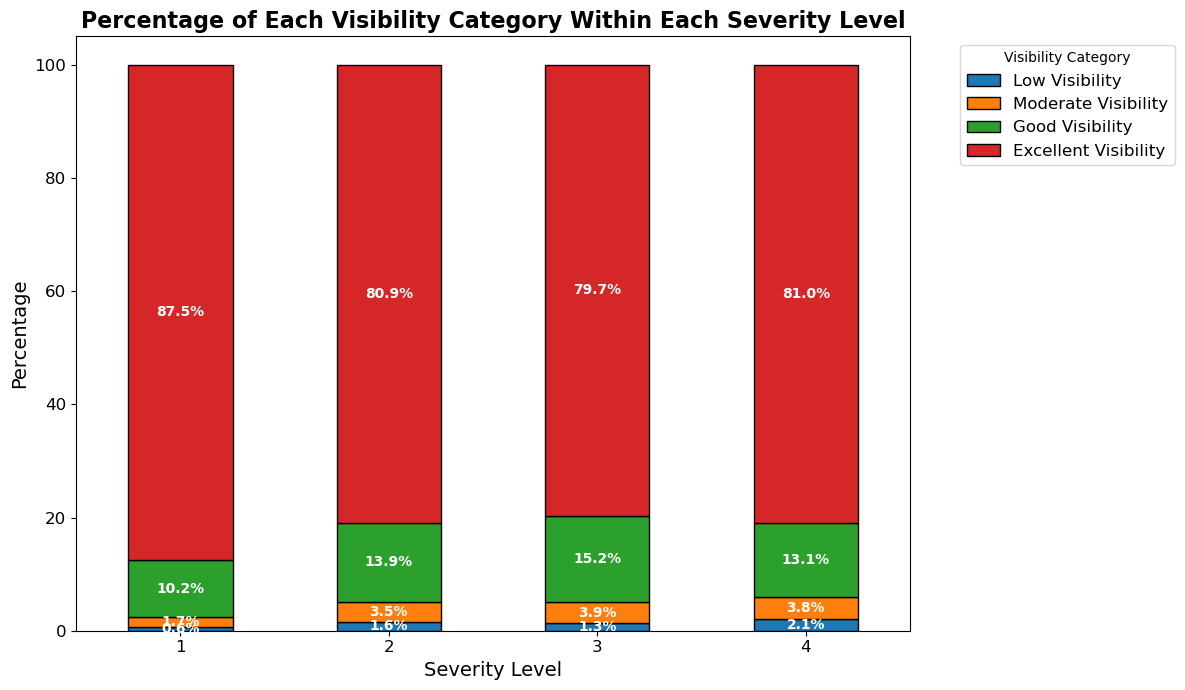

In [ ]:
import matplotlib.pyplot as plt

# Calculating percentages for each category within each severity level
percentage_table = contingency_table.div(contingency_table.sum(axis=1), axis=0) * 100

# Defining a more appealing color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

# Plotting a polished stacked bar chart
ax = percentage_table.plot(kind='bar', stacked=True, figsize=(12, 7), color=colors, edgecolor='black')
plt.title('Percentage of Each Visibility Category Within Each Severity Level', fontsize=16, fontweight='bold')
plt.xlabel('Severity Level', fontsize=14)
plt.ylabel('Percentage', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Visibility Category', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)

# Adding percentage labels to the bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    if height > 0:
        ax.text(x + width/2,
                y + height/2,
                f'{height:.1f}%',
                horizontalalignment='center',
                verticalalignment='center',
                fontsize=10,
                color='white',
                fontweight='bold')

plt.tight_layout()

# Show the plot
plt.show()

<Figure size 2000x900 with 0 Axes>

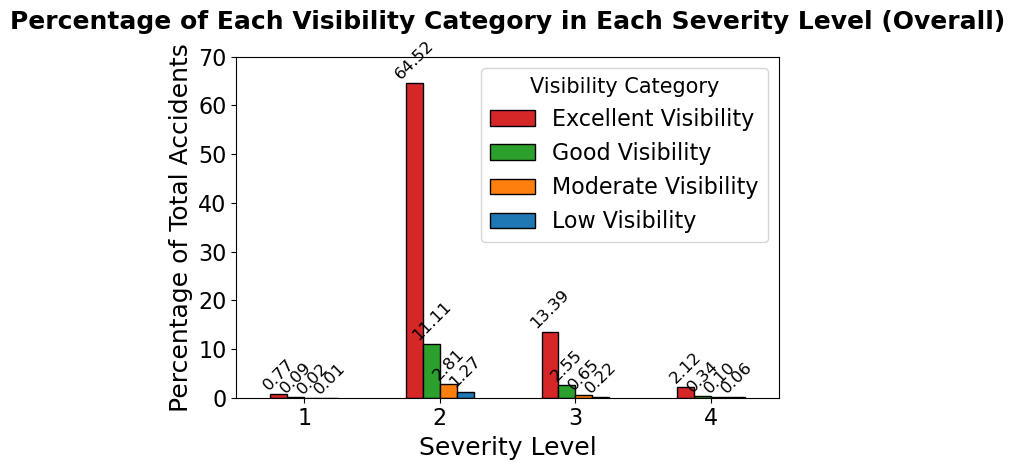

In [ ]:
# Calculating the percentage of each visibility category for each severity level, in relation to the total number of accidents
total_accidents = len(df)
overall_severity_percentages = df.groupby('Severity')['Visibility Category'].value_counts().unstack().fillna(0) / total_accidents * 100

colors = ['#d62728','#2ca02c','#ff7f0e','#1f77b4']

# Adjusting the figure size, y-axis range, and adding more space between the title and the columns
plt.figure(figsize=(20, 9))
ax = overall_severity_percentages.plot(kind='bar', color=colors, edgecolor='black')

plt.title('Percentage of Each Visibility Category in Each Severity Level (Overall)', fontsize=18, fontweight='bold', pad=20)  # Added padding for the title
plt.xlabel('Severity Level', fontsize=18)
plt.ylabel('Percentage of Total Accidents', fontsize=18)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(range(0, 71, 10), fontsize=16)  # Adjusted y-ticks to 70%
plt.legend(title='Visibility Category', fontsize=16, title_fontsize='15')
ax.set_ylim(0, 70)  # Extending y-axis range to 70%

# Adding slantwise percentage labels to each bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    label_text = f'{height:.2f}'
    ax.text(x + width/2, y + height + 0.2, label_text, ha='center', va='bottom', fontsize=12, rotation=45, color='black')

plt.tight_layout()

# Show the plot
plt.show()


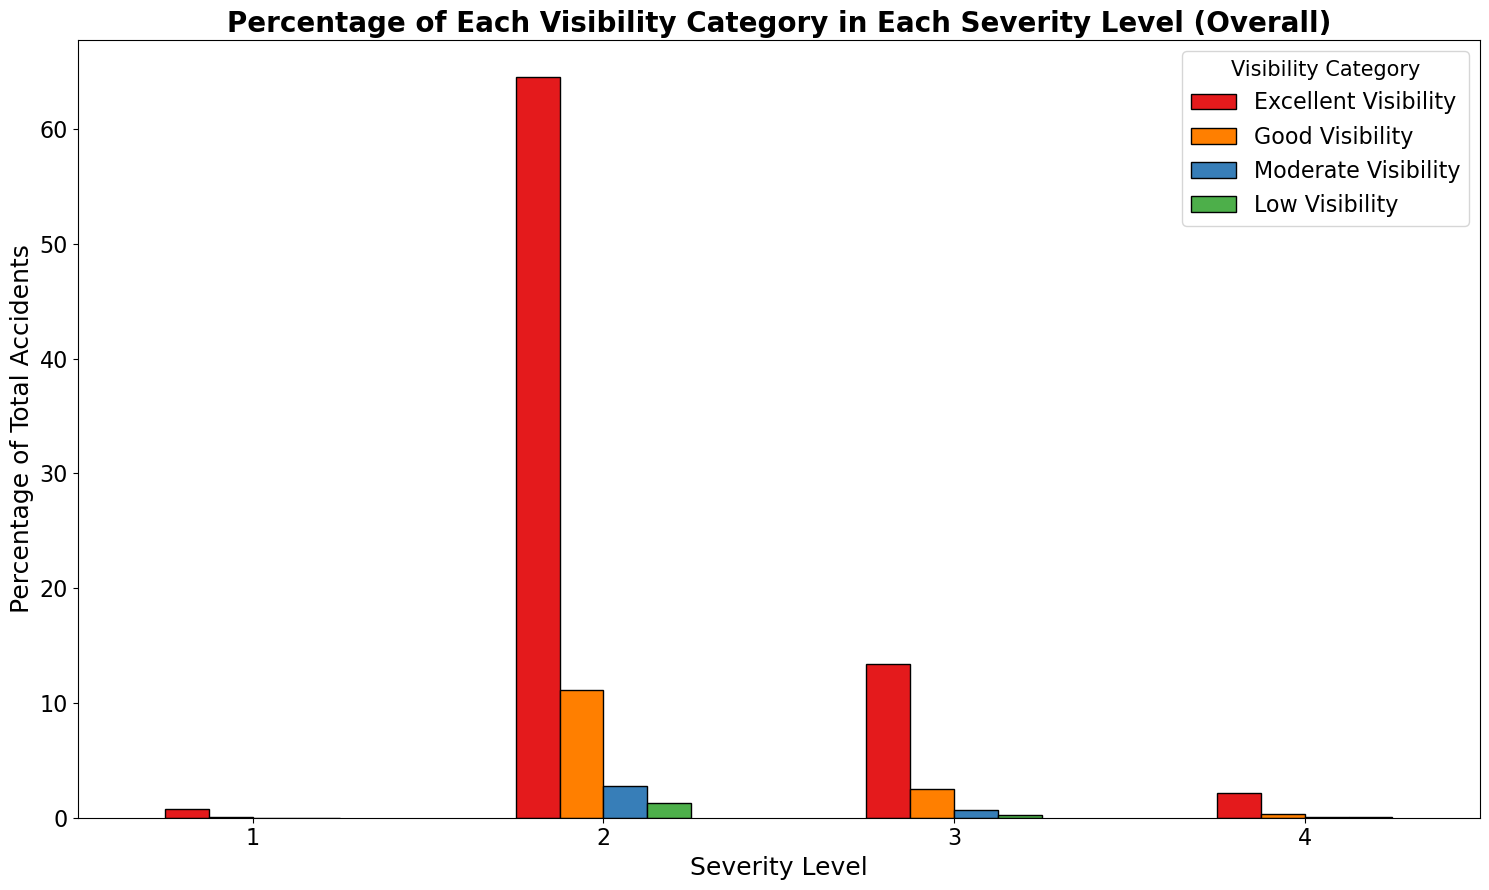

In [ ]:
# WITHOUT NUMBER
# Calculating the percentage of each visibility category for each severity level, in relation to the total number of accidents
total_accidents = len(df)
overall_severity_percentages = df.groupby('Severity')['Visibility Category'].value_counts().unstack().fillna(0) / total_accidents * 100

# Plotting the bar chart
plt.figure(figsize=(15, 9))
overall_severity_percentages.plot(kind='bar', color=['#e41a1c','#ff7f00','#377eb8','#4daf4a'], edgecolor='black', ax=plt.gca())

plt.title('Percentage of Each Visibility Category in Each Severity Level (Overall)', fontsize=20, fontweight='bold')
plt.xlabel('Severity Level', fontsize=18)
plt.ylabel('Percentage of Total Accidents', fontsize=18)
plt.xticks(rotation=0, fontsize=16)
plt.yticks(fontsize=16)
plt.legend(title='Visibility Category', fontsize=16, title_fontsize='15')
plt.tight_layout()

# Show the plot
plt.show()